# Titanic Dataset Problem

This project is based on the ship RMS Titanic which started from Southampton,England and was supposed to go to New York,USA. It was hyped up as the "unsinkable" ship. It was one of the most anti-climatic events in the history of mankind as the RMS Titanic collided with an iceberg in the Atlantic ocean and sunk. It's wreck now lies near Newfoundland beneath the waves, in the sea bed. Only a fraction of the people onboard it survived.

So, we will start by importing the training and testing dataset into train and test respectively. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

First, we will take a look at the training set. We will have a look at a couple of things :
1. The amount of data we have in the training set.
2. The first few data points(rows) of the dataset.

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So, we have 891 data points in the training set. The data is contained under 12 headings(columns). The target variable is **Survived** which has a value of 0 or 1 based on whether a certain person died or survived the crash. So, it is essentially a **classification** problem. 

Now, we will look at the data and make some insights from it.

# Data at a glance

We will look at the data types involved and the number of values each column contains.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


At a glance, we can say the following about the training set-
1. Columns **Age** , **Cabin** and **Embarked** have missing values
2. The columns **Sex**, **Ticket**, **Cabin** and **Embarked** contain values of **object** type. These columns have to be encoded before any modelling is done.

Now, we will look at the statistical overview(five number summary) of the numerical columns of the dataset.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can infer the following about the numerical columns:
1. PassengerId - This column is just like a Serial Number from 1 to 891. Hence, it is not of much use.
2. Survived - This is the target column. From the mean and median, we can conclusively say that there were more casualties than survivors.
3. PClass -  Although it is a numerical column, it seems that it holds categorical data. We will go into this later.
4. Age - As mentioned earlier, Age has some missing values. By looking at the five number summary, we can say that Age has a fairly normal distribution. This will be proven as correct or wrong later when we visualize the data. 
5. SibSp - This column is not a normal distribution, as the mean and median are far apart.
6. Parch - This column is not a normal distribution, as the mean and median are far apart. 
7. Fare - This column is not a normal distribution, as the mean and median are far apart. We have to normalise it. 


# Filling in Missing Values

Checking for missing values in each column.

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see that **Cabin** has 687 missing values out of a total of 891 values. That is around 77% of the data missing. So, we can not conclude anything about the missing data. Hence, it'd be better to avoid the Cabin column.

Now, let's look at the Embarked Column. It has 2 missing values. Let us look at its categories.

In [8]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked column has 2 missing values. From its analysis, we can see that 'S' has the highest frequency. We also find that if we make the missing values equal to either of 'S','C' or 'Q', it won't make a huge difference to our analysis and model. So,I decided to replace the null values with the mode, which is 'S'.

In [9]:
train['Embarked'].fillna('S',inplace = True)
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Now, moving on to the **Age** column.  From the 5-Number Summary of the Age column, we got to know that Age has a normal distribution because the mean = 29.699 is very close to the median = 28.0. We have 177 missing values in Age. Age can play a vital role in determining whether a person survived or not. We have two options to replace the missing values. One, we can replace them with the mean of the column or two, we can replace them with the median of the column. As it seems, we can replace them with either mean or median and it won't make a huge difference. I decided to replace the null values with the median, as median is much more robust to outliers than mean.

In [10]:
train['Age'].fillna(train['Age'].median(),inplace = True)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Exploratory Data Analysis

We will start by importing two packages - Matplotlib and Seaborn

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

We had inferred that Age has a fairly normal distribution. Let us check if it was correct.

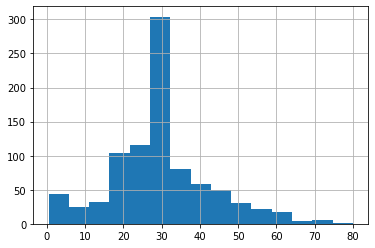

In [13]:
train['Age'].hist(bins=15)

This seems to be a normal distribution. Let us check if it has any outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaffc9bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaffc58390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaffc51390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaffc58e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaffc5e3d0>],
 'means': []}

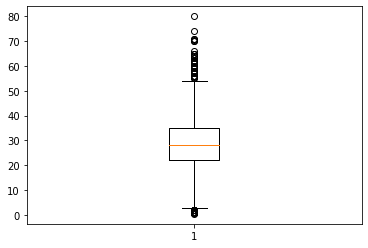

In [14]:
plt.boxplot(train['Age'])

There are a lot of outliers in Age, which have to be dealt with.

Now, let us move to the **Fare** column.

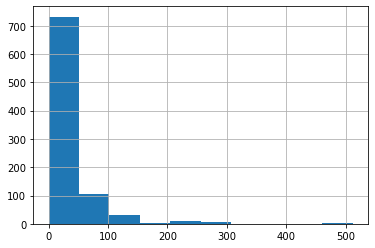

In [15]:
train['Fare'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaffb60650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaffb67110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaffb60090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaffb67bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaffb6e150>],
 'means': []}

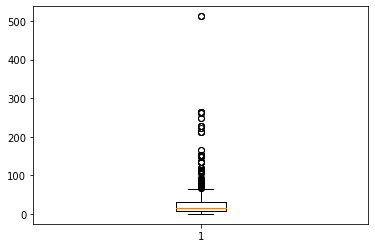

In [16]:
plt.boxplot(train['Fare'])

Fare has a huge number of outliers which, again, have to be dealt with before modelling. 

Now, let us check the PClass column

3    491
1    216
2    184
Name: Pclass, dtype: int64


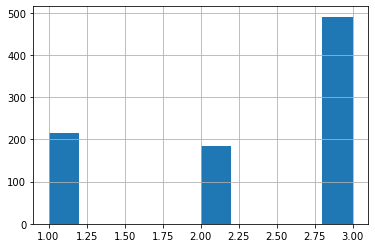

In [17]:
print(train['Pclass'].value_counts())
train['Pclass'].hist()

So, Pclass is a column containing categorical data in the form 1,2,3.

Now, we will have a look at the SibSp column

In [18]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

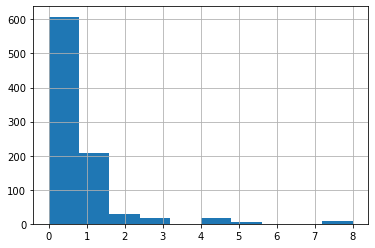

In [19]:
train['SibSp'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaff9dccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaff9e0790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaff9dc710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaff9e9290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaff9e97d0>],
 'means': []}

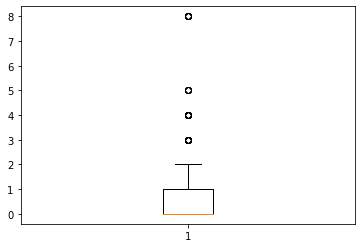

In [20]:
plt.boxplot(train['SibSp'])

SibSp is again a numerical column with a lot of outliers. These outliers have to be dealt with.

Looking at the Parch column

In [21]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

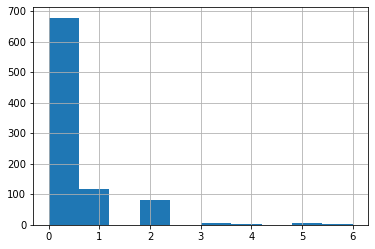

In [22]:
train['Parch'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaff8e6a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaff8ec4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaff8e6450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaff8ecf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaff8f4510>],
 'means': []}

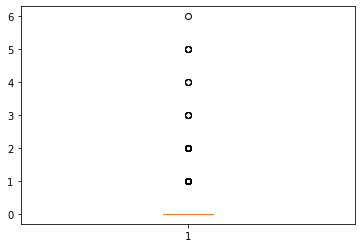

In [23]:
plt.boxplot(train['Parch'])

Parch also seems to have a lot of outliers. We have to deal with them.

# Outlier Handling

We will Start with the Age column. We have to find a function which removes the outliers.

In [24]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaff856310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaff856d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaff850d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaff85b890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaff85bdd0>],
 'means': []}

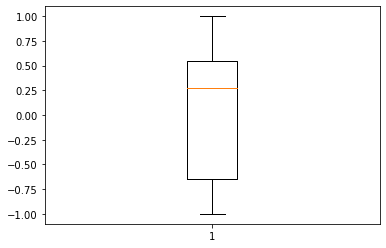

In [25]:
train['NewAge'] = np.sin(train['Age'])
plt.boxplot(train['NewAge'])

In [26]:
train['NewAge'].describe()

count    891.000000
mean       0.043269
std        0.646701
min       -0.999990
25%       -0.643538
50%        0.270906
75%        0.551427
max        0.999912
Name: NewAge, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbaff7cb910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbaff7d23d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbaff7cb350>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaff7d2e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaff7d9410>],
 'means': []}

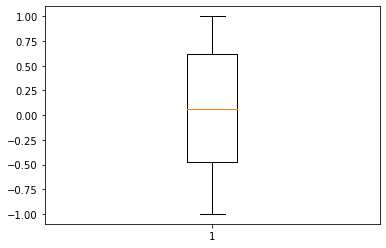

In [27]:
train['NewFare'] = np.cos(train['Fare'])
plt.boxplot(train['NewFare'])

Checking the probability of people surviving on the basis of Pclass

In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From this data we have found out a very important result - 
1. If a person is in Pclass 3, then the person has least chance of surviving.
2. If the person is in Pclass 1, then the person has a very high chance of surviving. 
So, Pclass and Survived have some correlation.

Creating a new feature fam.


In [29]:
train['fam'] = train['SibSp']+train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.008851,0.567924,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.762558,-0.070959,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.428183,-0.194765,0


Checking the probability of people surviving on the basis of fam

In [30]:
train[['fam', 'Survived']].groupby(['fam'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,fam,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [31]:
train['fam'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: fam, dtype: int64

So, what I did here is create a new feature called fam. This fam feature holds the number of people in the family, which by the logic of the problem is the summation of SibSp and Parch. We have found that with 3 family members, almost 72% people are surviving.

Checking the probability of people surviving on the basis of Sex

In [32]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


This is a very important piece of information. Females have much higher chances of survivng than males. Hence, the Sex column will be one of the most important columns for this data set.

Plotting Survived vs Age

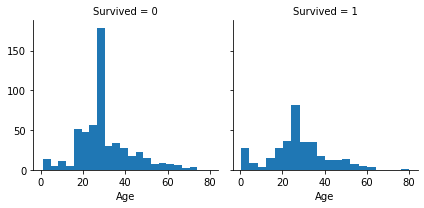

In [33]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Plotting Survived based on Pclass and Age

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


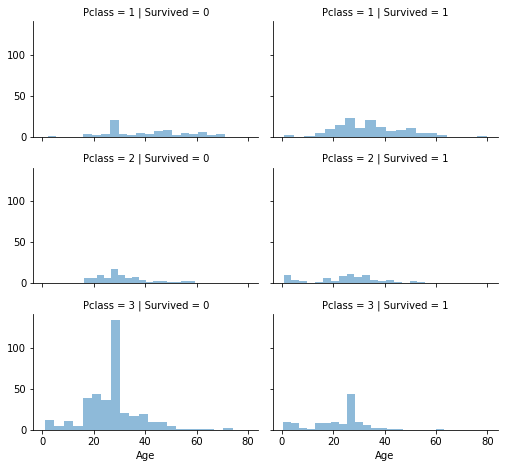

In [34]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


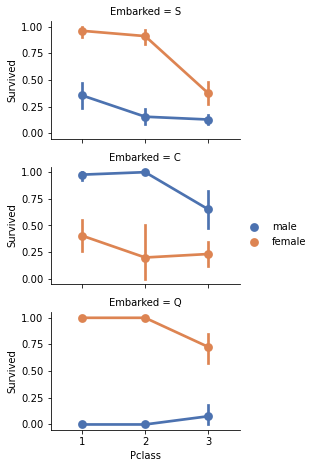

In [35]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Plotting Survived on the basis of Embarked Sex and Fare

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


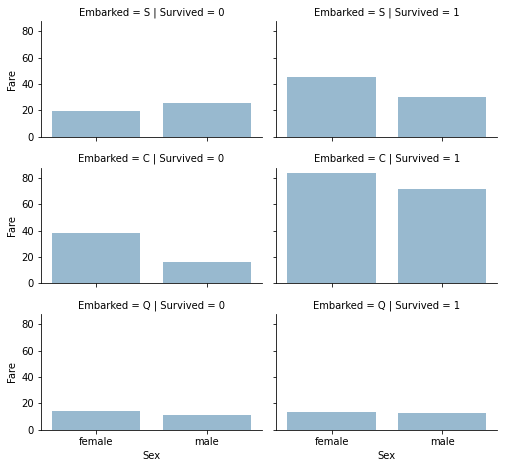

In [36]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Next jobs:
1. Extracting the title from name
2. Creating more meaningful features

Here is a generic function to extract the title from the name

In [37]:
import re
def findTitle(name):
    match = re.search("(Dr|Mrs?|Ms|Miss|Master|Rev|Capt|Mlle|Col|Major|Sir|Jonkheer|Lady|the Countess|Mme|Don)\\.",name)
    if match:
        title = match.group(0)
        if (title == 'Don.' or title == 'Major.' or title == 'Capt.'):
            title = 'Sir.'
        if (title == 'Mlle.' or title == 'Mme.'):
            title = 'Miss.'
        return title
    else:
        return "Other"
train["Title"] = train["Name"].apply(findTitle)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.008851,0.567924,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.762558,-0.070959,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.428183,-0.194765,0,Mr.


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  NewAge       891 non-null    float64
 13  NewFare      891 non-null    float64
 14  fam          891 non-null    int64  
 15  Title        891 non-null    object 
dtypes: float64(4), int64(6), object(6)
memory usage: 111.5+ KB


In [39]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Col.,0,2
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Master.,0,40
Miss.,185,0
Mr.,0,517
Mrs.,125,0
Ms.,1,0


Encoding the categories into numeric values

In [40]:
Uncommon = {'Lady.':0, 'the Countess.':0,'Capt.':0, 'Col.':0,'Don.':0, 'Dr.':0, 'Major.':0, 'Rev.':0, 'Sir.':0, 'Jonkheer.':0, 'Dona.':0}

train['Title'] = train['Title'].replace(Uncommon)
train['Title'].value_counts()

Mr.        517
Miss.      185
Mrs.       125
Master.     40
0           23
Ms.          1
Name: Title, dtype: int64

In [41]:
t = {5 : 'u'}
train['Title'] = train['Title'].replace(t)
train['Title'].value_counts()

Mr.        517
Miss.      185
Mrs.       125
Master.     40
0           23
Ms.          1
Name: Title, dtype: int64

In [42]:
title_encode = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4,'u':0,'Ms.':0}
train['Title'] = train['Title'].replace(title_encode)
train['Title'].value_counts()

1    517
2    185
3    125
4     40
0     24
Name: Title, dtype: int64

As we have extracted the title, name isn't of much use now. Even Passenger ID can be dropped.

In [43]:
train = train.drop(['Name', 'PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.008851,0.567924,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,1,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.762558,-0.070959,0,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,1,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,-0.428183,-0.194765,0,1


Encoding the 'Sex' column

In [44]:
sex_encode = {"male":1,"female":2}
train['Sex'] = train['Sex'].replace(sex_encode)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.008851,0.567924,1,1
1,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,1,3
2,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.762558,-0.070959,0,2
3,1,1,2,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,1,3
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S,-0.428183,-0.194765,0,1


Encoding the embarked column

In [45]:
train['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
embarked_encode = {'S':1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].replace(embarked_encode)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,1,-0.008851,0.567924,1,1
1,1,1,2,38.0,1,0,PC 17599,71.2833,C85,2,0.296369,-0.562549,1,3
2,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0.762558,-0.070959,0,2
3,1,1,2,35.0,1,0,113803,53.1000,C123,1,-0.428183,-0.953222,1,3
4,0,3,1,35.0,0,0,373450,8.0500,NaN,1,-0.428183,-0.194765,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


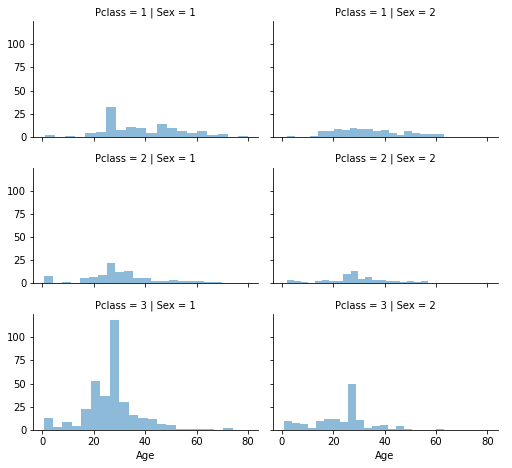

In [47]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

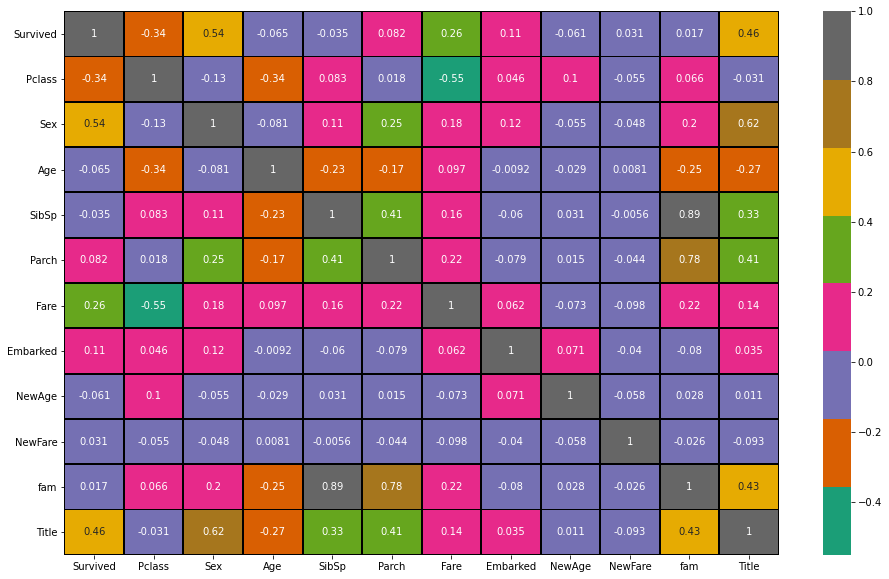

In [48]:
plt.figure(figsize= (16,10))
sns.heatmap(train.corr(),cmap = 'Dark2',annot = True,linewidths=1.0,linecolor='black')

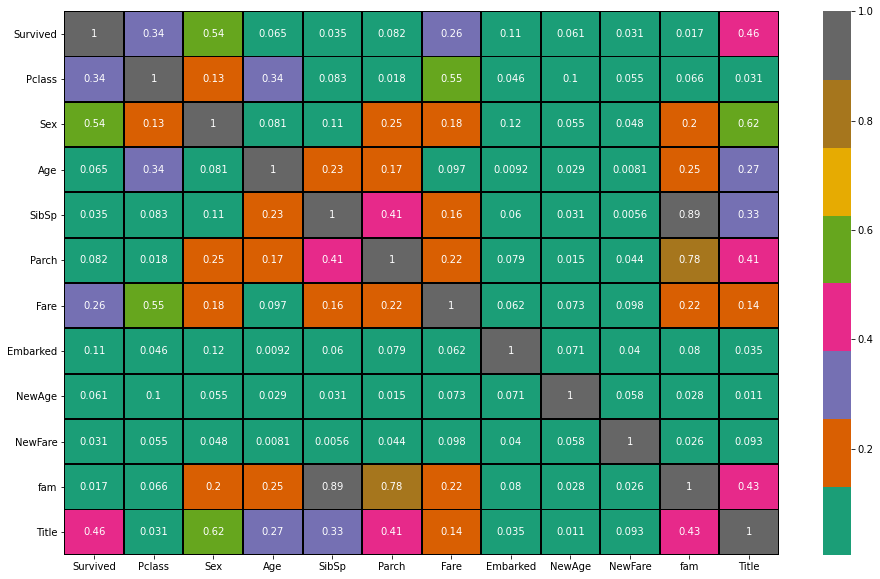

In [49]:
plt.figure(figsize= (16,10))
sns.heatmap(np.abs(train.corr()),cmap = 'Dark2',annot = True,linewidths=1.0,linecolor='black')

From the above heatmap, we can conclude that the Survived column is correlated to(high ones)-
1. Title
2. Sex
3. PClass
4. Fare
5. Embarked

Performing the same operations on the test set

In [50]:
test.shape

(418, 11)

In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test['Age'].fillna(test['Age'].median(),inplace = True)

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
test['Fare'].fillna(test['Fare'].median(),inplace = True)

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbafca6f610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbafca730d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbafca6f050>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbafca73b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbafc9fb110>],
 'means': []}

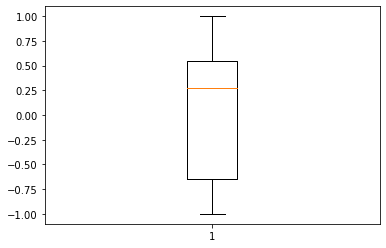

In [58]:
test['NewAge'] = np.sin(test['Age'])
plt.boxplot(train['NewAge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbafc9e0a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbafc9e6510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbafc9e0490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbafc9e6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbafc9ed550>],
 'means': []}

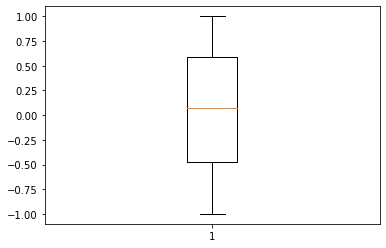

In [59]:
test['NewFare'] = np.cos(test['Fare'])
plt.boxplot(test['NewFare'])

In [60]:
test['fam'] = test['SibSp']+test['Parch']
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.057487,0.024779,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.123573,0.753902,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-0.739181,-0.965687,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.956376,-0.723265,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-0.008851,0.961367,2


In [61]:
test["Title"] = test["Name"].apply(findTitle)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.057487,0.024779,0,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.123573,0.753902,1,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-0.739181,-0.965687,0,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.956376,-0.723265,0,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-0.008851,0.961367,2,Mrs.


In [62]:
Uncommon = {'Lady.':'u', 'the Countess.':'u','Capt.':'u', 'Col.':'u','Don.':'u', 'Dr.':'u', 'Major.':'u', 'Rev.':'u', 'Sir.':'u', 'Jonkheer.':'u', 'Dona.':'u', 'Other':'u','Ms.':'u'}

test['Title'] = test['Title'].replace(Uncommon)
test['Title'].value_counts()
title_encode = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4,'u':0,'Ms.':0}
test['Title'] = test['Title'].replace(title_encode)
test['Title'].value_counts()


1    240
2     78
3     72
4     21
0      7
Name: Title, dtype: int64

In [63]:
sex_encode = {"male":1,"female":2}
test['Sex'] = test['Sex'].replace(sex_encode)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.057487,0.024779,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S,0.123573,0.753902,1,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,-0.739181,-0.965687,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.956376,-0.723265,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S,-0.008851,0.961367,2,3


In [64]:
embarked_encode = {'S':1,'C':2,'Q':3}
test['Embarked'] = test['Embarked'].replace(embarked_encode)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,0.057487,0.024779,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,1,0.123573,0.753902,1,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3,-0.739181,-0.965687,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,0.956376,-0.723265,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,1,-0.008851,0.961367,2,3


In [65]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,fam,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,1,-0.008851,0.567924,1,1
1,1,1,2,38.0,1,0,PC 17599,71.2833,C85,2,0.296369,-0.562549,1,3
2,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0.762558,-0.070959,0,2
3,1,1,2,35.0,1,0,113803,53.1000,C123,1,-0.428183,-0.953222,1,3
4,0,3,1,35.0,0,0,373450,8.0500,NaN,1,-0.428183,-0.194765,0,1


Model Creation

In [66]:
from sklearn.linear_model import LogisticRegression   
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [67]:
def classification_model(model, data, predictors, outcome):  
    #Fit the model:  
    model.fit(data[predictors],data[outcome])    
    #Make predictions on training set:  
    predictions = model.predict(data[predictors])    
    #Print accuracy  
    accuracy = metrics.accuracy_score(predictions,data[outcome])  
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds  
    kf = KFold(5,shuffle=True)  
    error = []  
    for train, test in kf.split(data):
        # Filter training data    
        train_predictors = (data[predictors].iloc[train,:])        
        # The target we're using to train the algorithm.    
        train_target = data[outcome].iloc[train]        
        # Training the algorithm using the predictors and target.    
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run    
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
     
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))) 
    # %s is placeholder for data from format, next % is used to conert it into percentage
    #.3% is no. of decimals
    return model

In [68]:
output = 'Survived'
model = RandomForestClassifier()
predict = ['Sex','Title','Pclass']
classification_model(model,train,predict,output)
m = classification_model(model,train,predict,output)
a = m.predict(test[predict])
a

Accuracy : 80.022%
Cross-Validation Score : 77.893%
Accuracy : 80.022%
Cross-Validation Score : 78.119%


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
my_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': a})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)